In [48]:
# Main data packages. 
import numpy as np
import pandas as pd

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [49]:
df = pd.read_csv('../data/neueFische_Wetter.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        87672 non-null  object 
 1   temp        87672 non-null  float64
 2   feels_like  87672 non-null  float64
 3   pressure    87672 non-null  int64  
 4   humidity    87672 non-null  int64  
 5   clouds      87672 non-null  int64  
 6   visibility  84921 non-null  float64
 7   wind_speed  87672 non-null  float64
 8   wind_deg    87672 non-null  int64  
 9   wind_gust   30566 non-null  float64
 10  rain_1h     14258 non-null  float64
 11  snow_1h     1046 non-null   float64
 12  weather_id  87672 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 8.7+ MB


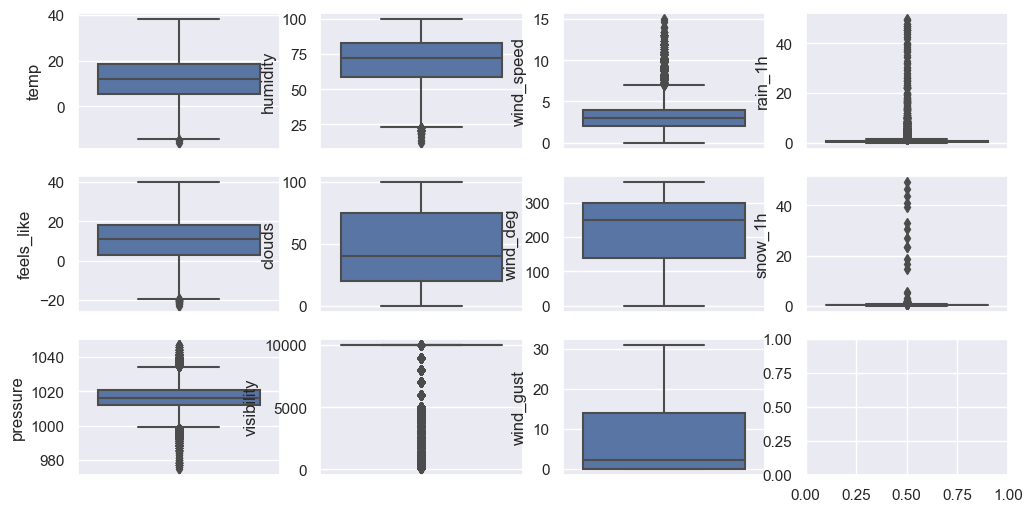

In [51]:
sns.set()
fig, axes = plt.subplots(3,4)
ax=int(0)
ay=int(0)
ay2=0
for e in ['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h',
       'snow_1h']:  
       sns.boxplot(data=df, y=e, ax=axes[ay,ax])
       ax+=1
       ay2+=1
       ay=int(ay2%3)
       ax=int(ax-ay/4)

In [52]:
df.tail()

time   temp  feels_like  pressure  humidity  \
87667  2021-12-31 20:00:00 +01:00  13.15       12.48      1020        75   
87668  2021-12-31 21:00:00 +01:00  13.79       13.08      1020        71   
87669  2021-12-31 22:00:00 +01:00  14.38       13.68      1020        69   
87670  2021-12-31 23:00:00 +01:00  14.58       13.87      1020        68   
87671  2022-01-01 00:00:00 +01:00  14.48       13.73      1021        67   

       clouds  visibility  wind_speed  wind_deg  wind_gust  rain_1h  snow_1h  \
87667      70         NaN        1.34       243       2.68     0.25      NaN   
87668      57         NaN        1.34       239       3.58      NaN      NaN   
87669      93         NaN        2.68       309       4.02      NaN      NaN   
87670       0     10000.0        3.13       208       4.02     1.52      NaN   
87671       0     10000.0        4.02       187       8.05     1.52      NaN   

       weather_id  
87667         500  
87668         803  
87669         804  
87670         501  
87671         501

In [53]:
df.describe().T

count         mean          std     min       25%       50%  \
temp        87672.0    12.155226     8.632749  -15.77      5.35     11.89   
feels_like  87672.0    10.876790     9.774918  -22.77      3.18     11.03   
pressure    87672.0  1016.465143     8.097692  975.00   1012.00   1016.00   
humidity    87672.0    70.286066    16.109694   12.00     59.00     72.00   
clouds      87672.0    42.673077    32.650085    0.00     20.00     40.00   
visibility  84921.0  9296.869373  2045.574641   50.00  10000.00  10000.00   
wind_speed  87672.0     3.132998     1.987412    0.00      2.00      3.00   
wind_deg    87672.0   215.922290    97.071699    0.00    140.00    250.00   
wind_gust   30566.0     6.116232     7.105029    0.00      0.00      2.24   
rain_1h     14258.0     0.861530     2.704707    0.10      0.19      0.32   
snow_1h      1046.0     0.718748     3.673989    0.10      0.15      0.24   
weather_id  87672.0   728.965474   127.793008  200.00    701.00    800.00   

                 75%       max  
temp           18.62     38.11  
feels_like     18.29     40.04  
pressure     1021.00   1047.00  
humidity       83.00    100.00  
clouds         75.00    100.00  
visibility  10000.00  10000.00  
wind_speed      4.00     15.00  
wind_deg      300.00    360.00  
wind_gust      14.00     31.00  
rain_1h         0.73     49.78  
snow_1h         0.38     49.28  
weather_id    802.00    804.00

In [54]:
#df.wind_gust.fillna(df.wind_speed,inplace=True)
df.rain_1h.fillna(0,inplace=True)
df.snow_1h.fillna(0,inplace=True)
#df.visibility.fillna(10000,inplace=True)

In [55]:
df.loc[df.visibility.isna()]

time   temp  feels_like  pressure  humidity  \
3233   2012-05-14 19:00:00 +02:00  11.81       10.72      1015        64   
3551   2012-05-28 01:00:00 +02:00  16.79       15.75      1015        47   
3565   2012-05-28 15:00:00 +02:00  19.70       19.06      1012        51   
3716   2012-06-03 22:00:00 +02:00  21.47       21.79      1004        81   
3719   2012-06-04 01:00:00 +02:00  19.17       19.31      1006        83   
...                           ...    ...         ...       ...       ...   
87648  2021-12-31 01:00:00 +01:00  13.38       13.05      1021        87   
87665  2021-12-31 18:00:00 +01:00  13.04       12.41      1021        77   
87667  2021-12-31 20:00:00 +01:00  13.15       12.48      1020        75   
87668  2021-12-31 21:00:00 +01:00  13.79       13.08      1020        71   
87669  2021-12-31 22:00:00 +01:00  14.38       13.68      1020        69   

       clouds  visibility  wind_speed  wind_deg  wind_gust  rain_1h  snow_1h  \
3233       94         NaN        0.00       300        NaN     0.00      0.0   
3551       24         NaN        1.00       160        NaN     0.00      0.0   
3565       96         NaN        4.00        40        NaN     0.24      0.0   
3716       36         NaN        0.00       290        NaN     0.00      0.0   
3719       76         NaN        0.00       280        NaN     0.88      0.0   
...       ...         ...         ...       ...        ...      ...      ...   
87648      81         NaN        0.45       273       3.58     0.51      0.0   
87665       5         NaN        0.89       237       1.34     0.00      0.0   
87667      70         NaN        1.34       243       2.68     0.25      0.0   
87668      57         NaN        1.34       239       3.58     0.00      0.0   
87669      93         NaN        2.68       309       4.02     0.00      0.0   

       weather_id  
3233          804  
3551          801  
3565          500  
3716          802  
3719          500  
...           ...  
87648         500  
87665         800  
87667         500  
87668         803  
87669         804  

[2751 rows x 13 columns]

KeyboardInterrupt: 

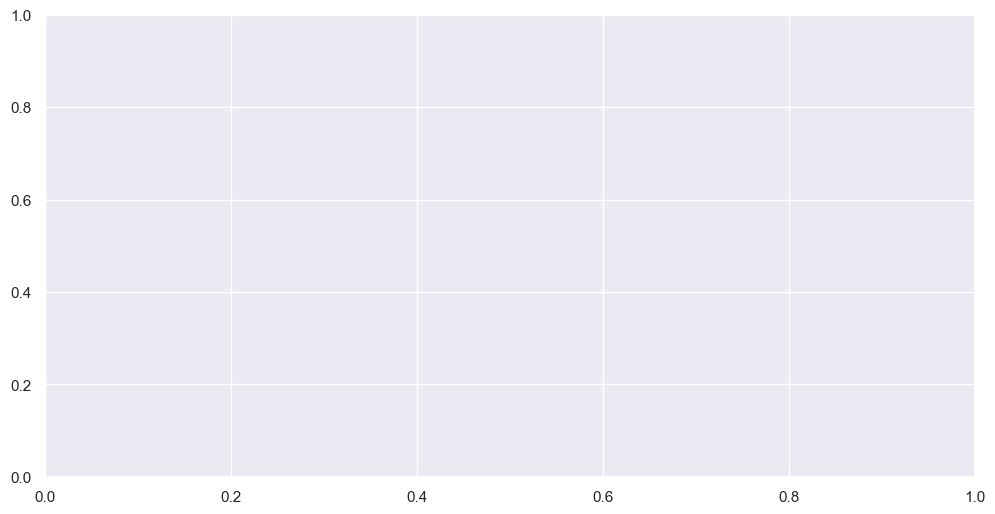

In [57]:
df['vislies']=df.visibility.isna()
df.visibility.fillna(5000,inplace=True)
sns.lineplot(data=df, x='time', y='visibility', hue='vislies')

In [58]:
#sns.scatterplot(data=df, x='time', y='visibility', hue='vislies')

In [59]:
# Turn wind data into sensible format
df["wind_dir_x"] = df.wind_deg.apply(lambda x: np.cos(np.array(x) * np.pi /180))
df["wind_dir_y"] = df.wind_deg.apply(lambda x: np.sin(np.array(x) * np.pi /180))

In [60]:
df.describe().round(2)

temp  feels_like  pressure  humidity    clouds  visibility  \
count  87672.00    87672.00  87672.00  87672.00  87672.00    87672.00   
mean      12.16       10.88   1016.47     70.29     42.67     9162.04   
std        8.63        9.77      8.10     16.11     32.65     2148.08   
min      -15.77      -22.77    975.00     12.00      0.00       50.00   
25%        5.35        3.18   1012.00     59.00     20.00    10000.00   
50%       11.89       11.03   1016.00     72.00     40.00    10000.00   
75%       18.62       18.29   1021.00     83.00     75.00    10000.00   
max       38.11       40.04   1047.00    100.00    100.00    10000.00   

       wind_speed  wind_deg  wind_gust   rain_1h   snow_1h  weather_id  \
count    87672.00  87672.00   30566.00  87672.00  87672.00    87672.00   
mean         3.13    215.92       6.12      0.14      0.01      728.97   
std          1.99     97.07       7.11      1.14      0.41      127.79   
min          0.00      0.00       0.00      0.00      0.00      200.00   
25%          2.00    140.00       0.00      0.00      0.00      701.00   
50%          3.00    250.00       2.24      0.00      0.00      800.00   
75%          4.00    300.00      14.00      0.00      0.00      802.00   
max         15.00    360.00      31.00     49.78     49.28      804.00   

       wind_dir_x  wind_dir_y  
count    87672.00    87672.00  
mean         0.03       -0.23  
std          0.67        0.71  
min         -1.00       -1.00  
25%         -0.64       -0.87  
50%          0.14       -0.50  
75%          0.64        0.50  
max          1.00        1.00

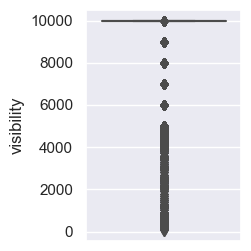

In [61]:
fig, ax = plt.subplots(figsize = (2, 3))
sns.boxplot(y=df.visibility, ax=ax)
plt.show()


Input Weather Codes

In [62]:
codes = pd.read_csv('../data/neueFische_Wettercodes.csv')
codes.columns = ['weather_id', 'WeatherMain', 'WeatherDescription']

In [63]:
df = pd.merge(df, codes,how='left',on='weather_id')

Extract year, month, day, hour

In [64]:
df.time = df.apply(lambda x: pd.to_datetime(x['time'],utc=True),axis=1)
df = df.assign(
    #timestamp = lambda x: pd.to_datetime(x['time'],utc=True), 
    date = lambda x: x['time'].dt.date,
    year = lambda x: x['time'].dt.year,
    month = lambda x: x['time'].dt.month,
    week = lambda x: x['time'].dt.isocalendar().week,
    day = lambda x: x['time'].dt.day,
    weekday = lambda x: x['time'].dt.weekday,
    dayofyear = lambda x: x['time'].dt.dayofyear,
    hour = lambda x: x['time'].dt.hour,
)
df.weekday.replace({0:'Mo',
                    1:'Tu',
                    2:'We',
                    3:'Th',
                    4:'Fr',
                    5:'Sa',
                    6:'Su'},inplace=True)

In [65]:
df.head()

time  temp  feels_like  pressure  humidity  clouds  \
0 2012-01-01 00:00:00+00:00  2.43        2.43      1017        77      75   
1 2012-01-01 01:00:00+00:00  2.43        2.43      1017        77      75   
2 2012-01-01 02:00:00+00:00  0.96       -2.82      1017        80      75   
3 2012-01-01 03:00:00+00:00  2.22        2.22      1017        91      90   
4 2012-01-01 04:00:00+00:00  2.22        2.22      1017        91      90   

   visibility  wind_speed  wind_deg  wind_gust  ...  WeatherMain  \
0      4200.0         1.0        90        NaN  ...       Clouds   
1      4200.0         1.0        90        NaN  ...         Snow   
2     10000.0         3.6       180        NaN  ...         Snow   
3      4700.0         1.0       220        NaN  ...         Rain   
4      4700.0         1.0       220        NaN  ...         Rain   

      WeatherDescription        date  year  month  week day weekday dayofyear  \
0  broken clouds: 51-84%  2012-01-01  2012      1    52   1      Su         1   
1             light snow  2012-01-01  2012      1    52   1      Su         1   
2             light snow  2012-01-01  2012      1    52   1      Su         1   
3             light rain  2012-01-01  2012      1    52   1      Su         1   
4             light rain  2012-01-01  2012      1    52   1      Su         1   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  

[5 rows x 26 columns]

In [66]:
daytaframe = df.groupby('date').agg('mean')
dyf = daytaframe

<AxesSubplot:xlabel='month', ylabel='rain_1h'>

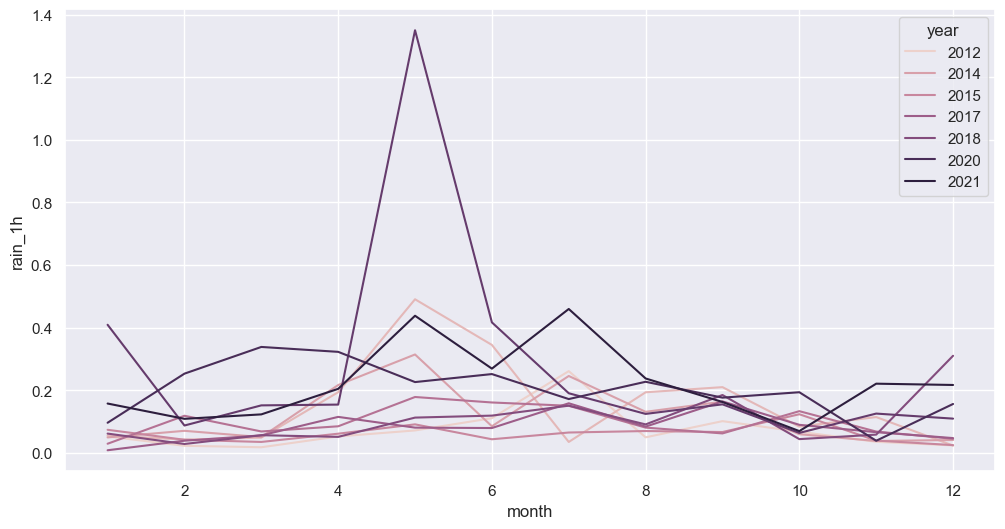

In [67]:
sns.lineplot(data=df.groupby(['year','month']).agg('mean'), x='month', y='rain_1h',hue='year')

<AxesSubplot:xlabel='month', ylabel='snow_1h'>

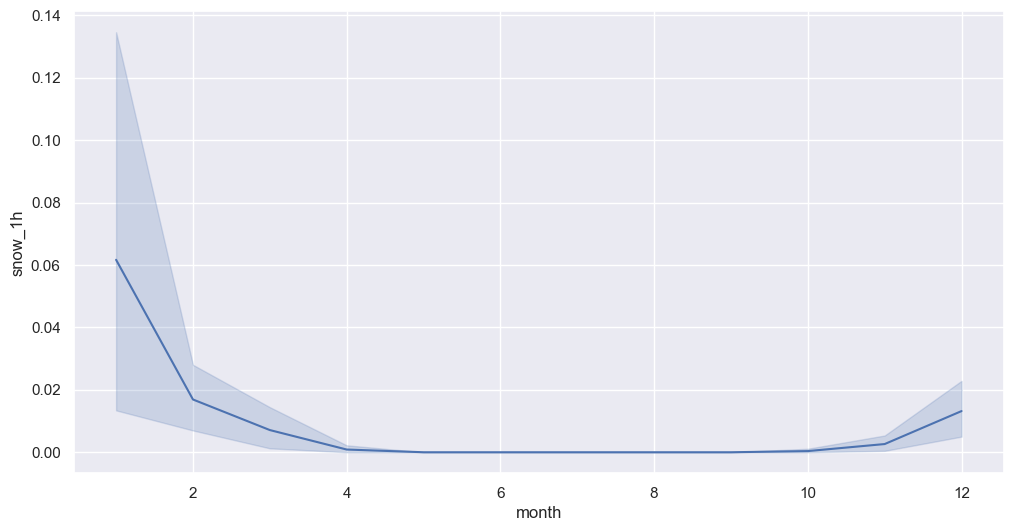

In [68]:
sns.lineplot(data=df.groupby(['year','month']).agg('mean'), x='month', y='snow_1h')#,hue='year')

<AxesSubplot:xlabel='month', ylabel='feels_like'>

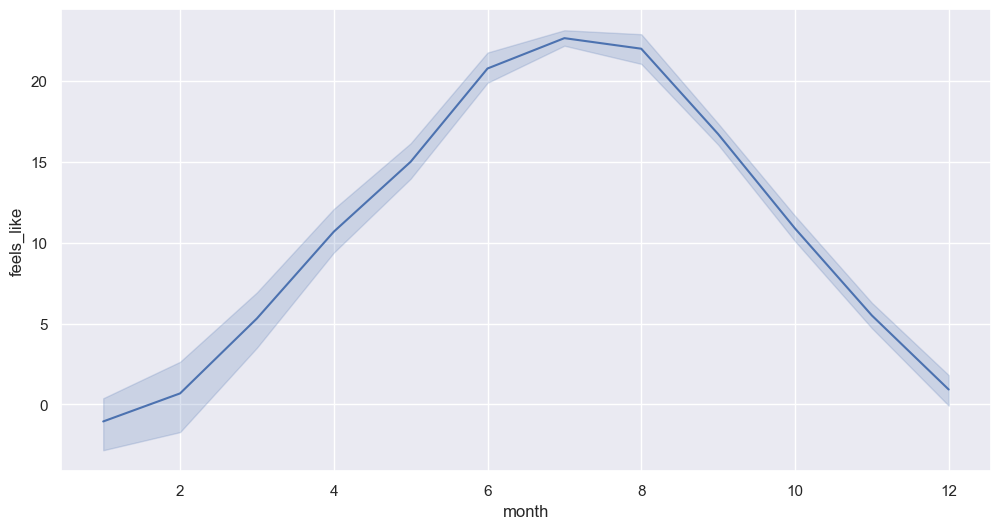

In [69]:
sns.lineplot(data=df.groupby(['year','month']).agg('mean'), x='month', y='feels_like')#,hue='year')

In [70]:
winddata = pd.DataFrame(df[['wind_speed','wind_deg']].value_counts().reset_index())

In [71]:
winddata.columns = ['wind_speed', 'wind_deg', 'frequency']

In [72]:
import plotly.express as px
fig = px.bar_polar(winddata.query('frequency>60'), r='frequency', theta="wind_deg",
                   color="wind_speed", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   log_r=True)
fig.show()

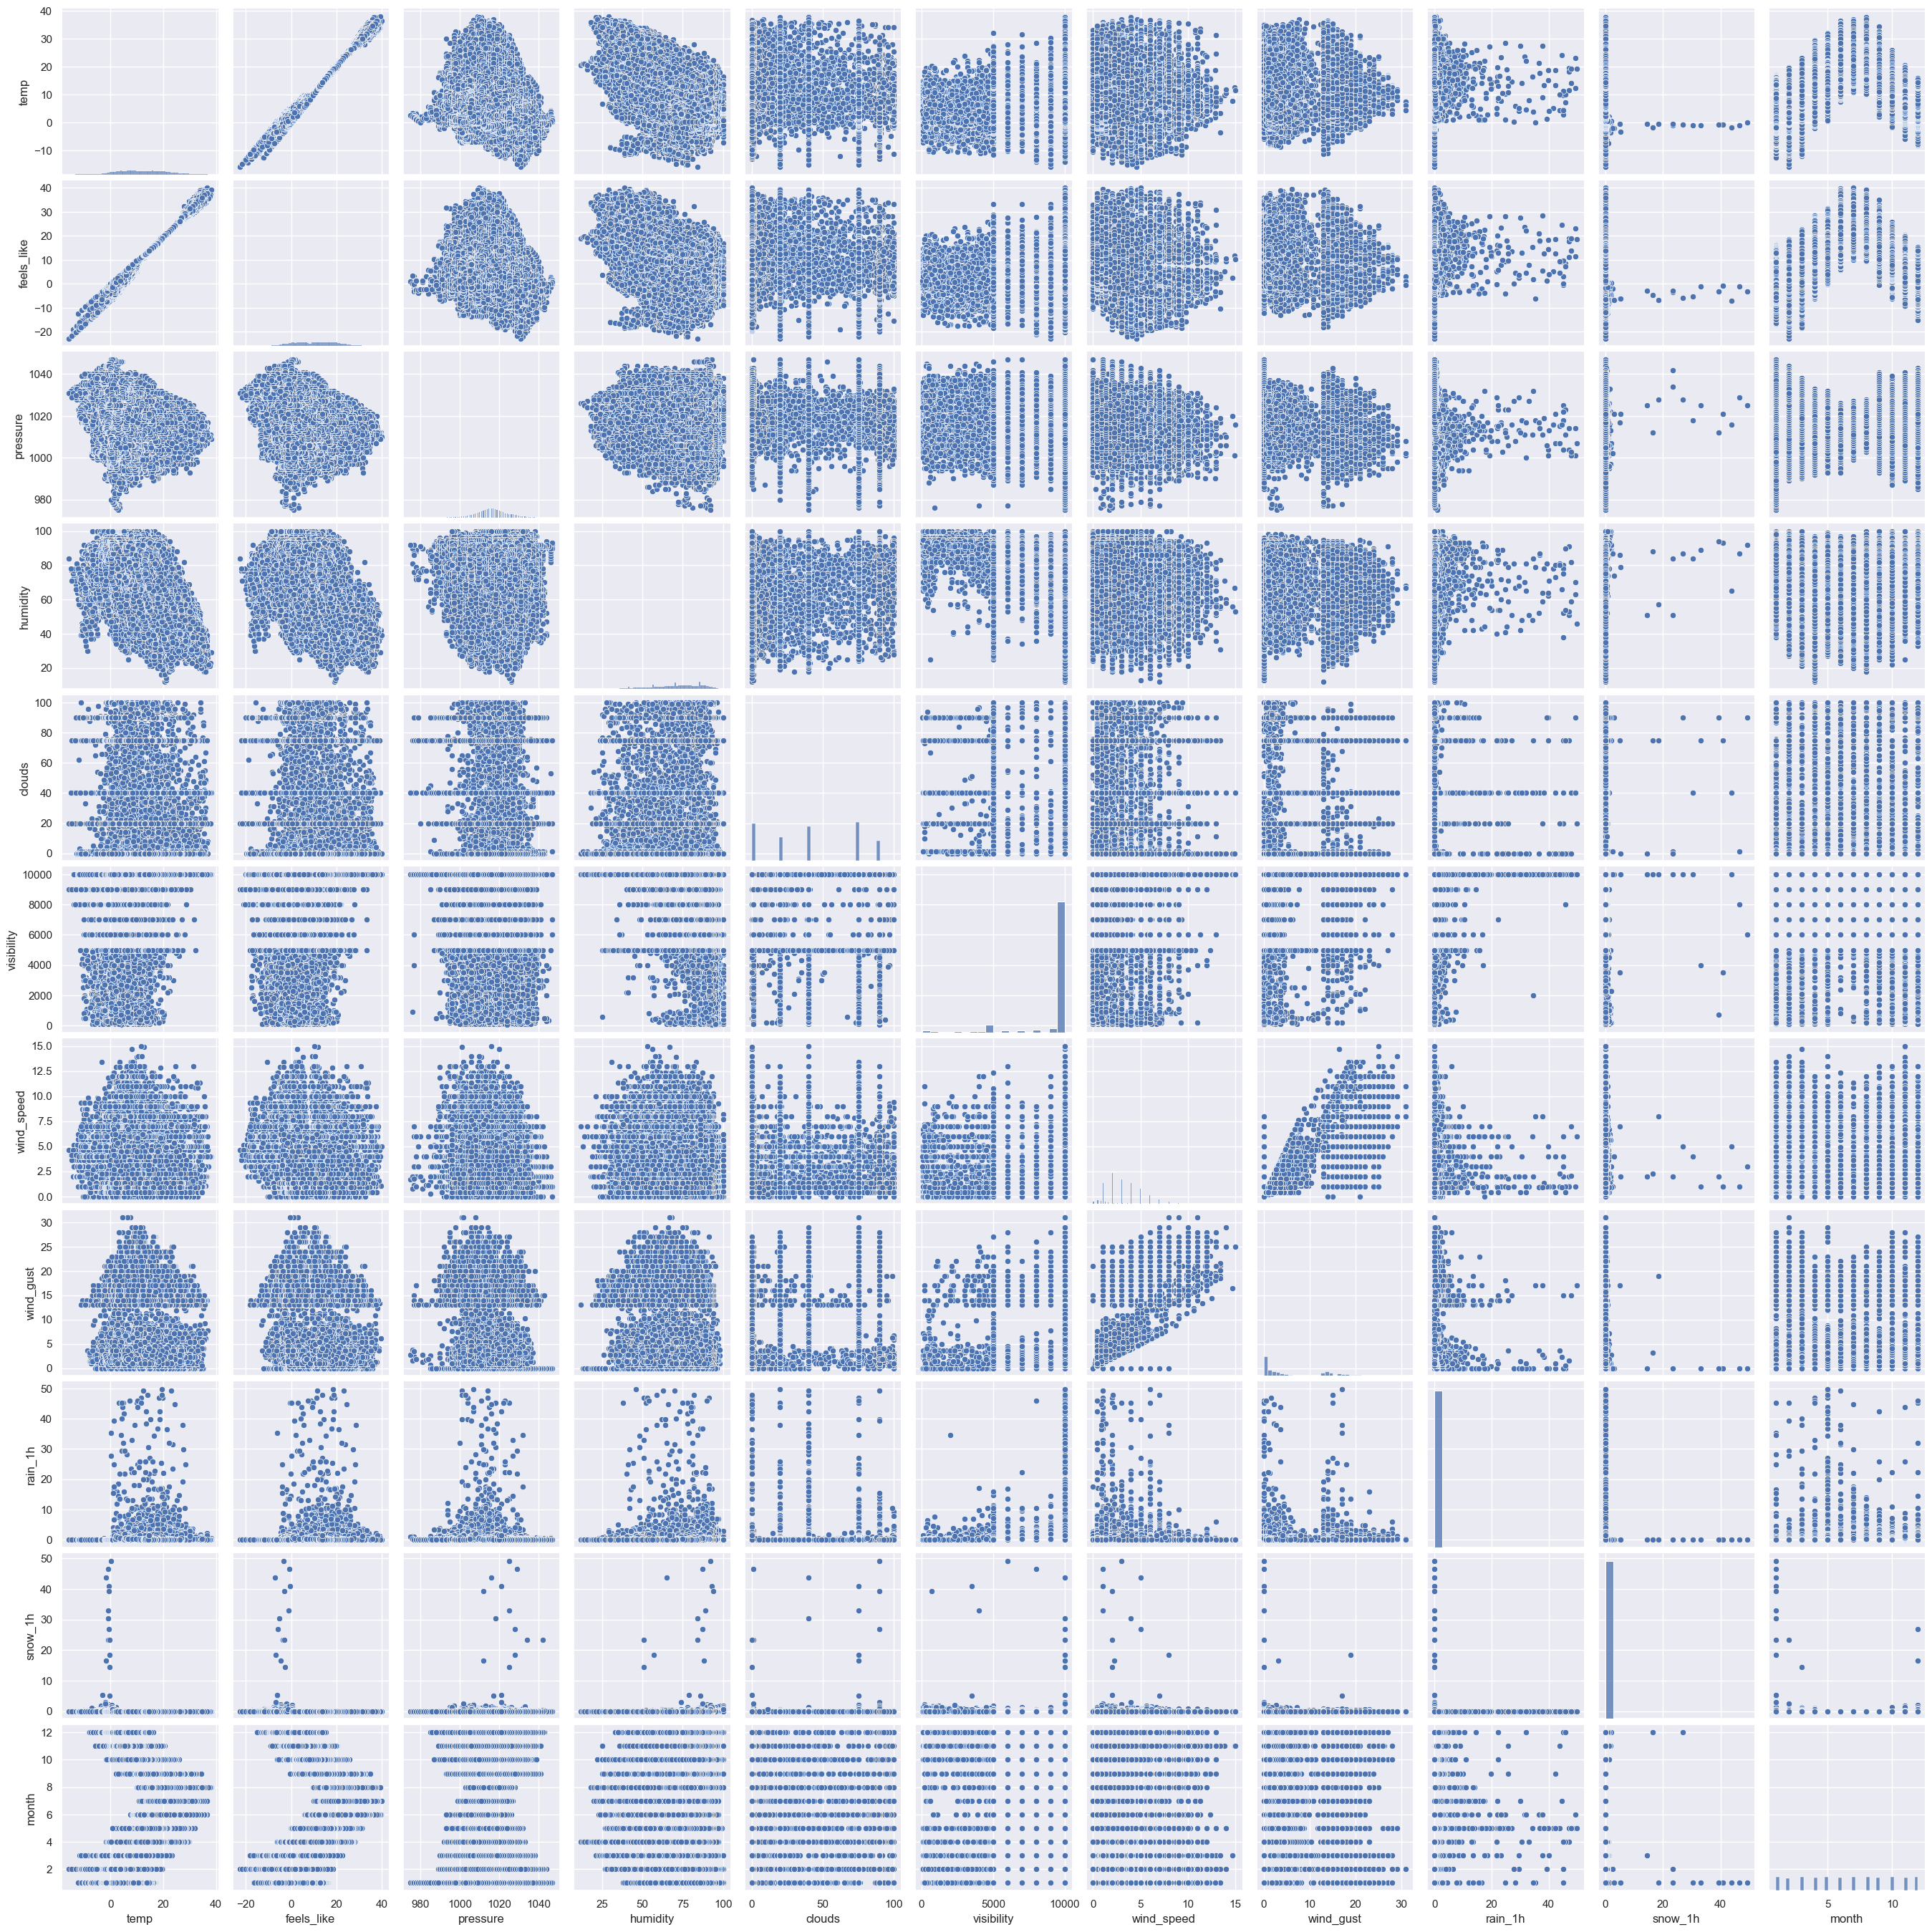

In [73]:
sns.pairplot(df[['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_gust', 'rain_1h',
       'snow_1h', 'month']])

Plot ['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_gust', 'rain_1h',
       'snow_1h', 'wind_dir_x', 'wind_dir_y',]
 by:
- whole time
- course over a(ny) day
- average course over all days
- course over a week (to see recurring daily patterns)
- course over all weeks

['date', 'year', 'month', 'week', 'day', 'weekday', 'dayofyear', 'hour']

In [74]:
params = ['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_gust', 'rain_1h',
       'snow_1h', 'wind_dir_x', 'wind_dir_y']

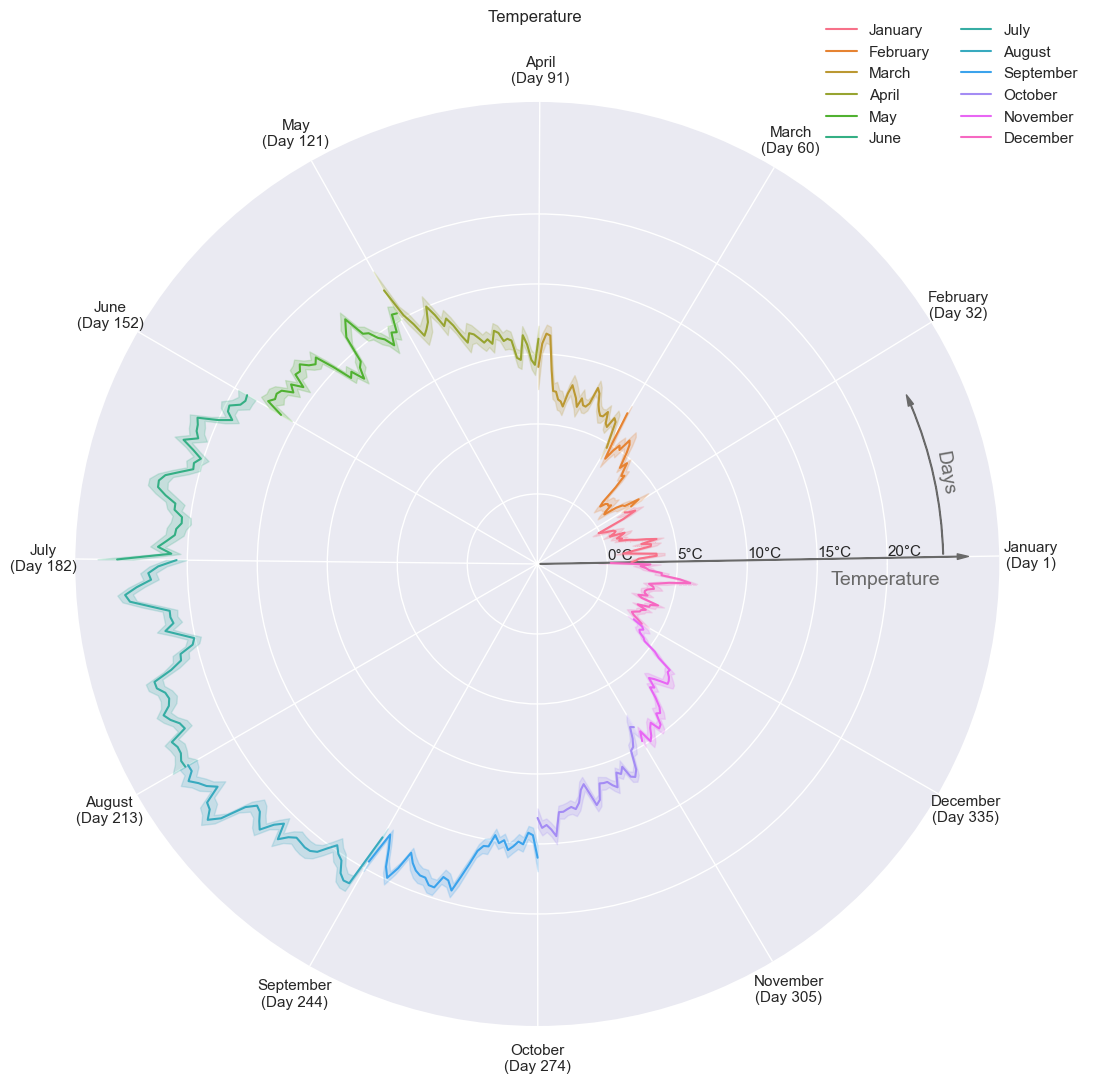

In [75]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='temp', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

fancy_plot=True     #this is only to make the plot more beautiful. If you just want to see how the data looks without the adjustments to the plot set fancy_plot to False
if(fancy_plot): 
    days_per_month=[0] + [monthrange(2021, i)[1] for i in range(1,12)]      #findout how many days each month has ()
    month_start=np.cumsum(days_per_month) +1                                #add 1 to start at 0 instead of 0, take the cumsum to get ech months starting day
    month_start_theta=[i *2 * np.pi / 365.25 for i in month_start]          #turn start day into an angle (in rad), use 365.25 as the average length of a year

    month_label=[month_name[i] for i in range(1,13)]
    month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]

    ax.set_title('Temperature ', va='bottom',pad=22);
    ax.spines.clear()
    
    ax.set_xlabel('')
    ax.set_xticks(month_start_theta)
    ax.set_xticklabels(month_label_long)
    
    ax.set_ylabel('')    
    ax.set_ylim(-5,28)
    ax.set_yticks(yt:=[0,5,10,15,20])
    ax.set_yticklabels([str(t)+'°C' for t in yt], rotation = 45)

    #Arrows / Annotations
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="dimgrey")
    ax.set_rlabel_position(1) 
    ax.text(13*2*np.pi/360,24,"Days",size=14,color='dimgrey',rotation=-80,va='center')
    ax.text(-3*2*np.pi/360,16,"Temperature",size=14,color='dimgrey',rotation=-0,va='center')
    a1 = patches.FancyArrowPatch((1*np.pi/180, -5), (1*np.pi/180, 26), **kw)

    a2 = patches.FancyArrowPatch((1*np.pi/180, 24), (25*np.pi/180, 24),
                                connectionstyle=f"arc3,rad={0.105}", **kw)
    
    ax.add_patch(a1)
    ax.add_patch(a2)


    ax.set_rorigin(-5)
    ax.xaxis.set_tick_params(which='major',pad=10)

    ax.legend(labels=month_label,ncol=2,facecolor='white',edgecolor='white',bbox_to_anchor=(1.1, 1.1), loc=1)

    ax.figure.set_figwidth(12)
    ax.figure.set_figheight(12)


ax.figure.savefig("../images/Temp_polar.png",dpi=300)

ValueError: The palette list has the wrong number of colors.

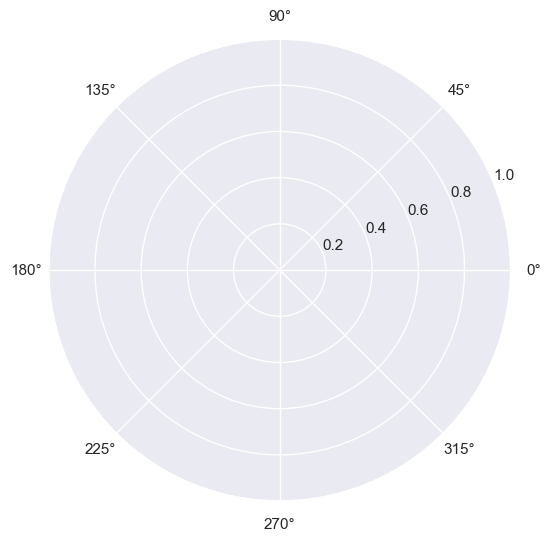

In [76]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df \
    .assign(day_of_year_cyclic = lambda x: x['day'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='temp', 
        hue='year',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

fancy_plot=False     #this is only to make the plot more beautiful. If you just want to see how the data looks without the adjustments to the plot set fancy_plot to False
if(fancy_plot): 
    days_per_month=[0] + [monthrange(2021, i)[1] for i in range(1,12)]      #findout how many days each month has ()
    month_start=np.cumsum(days_per_month) +1                                #add 1 to start at 0 instead of 0, take the cumsum to get ech months starting day
    month_start_theta=[i *2 * np.pi / 365.25 for i in month_start]          #turn start day into an angle (in rad), use 365.25 as the average length of a year

    month_label=[month_name[i] for i in range(1,13)]
    month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]

    ax.set_title('Temperature ', va='bottom',pad=22);
    ax.spines.clear()
    
    ax.set_xlabel('')
    ax.set_xticks(month_start_theta)
    ax.set_xticklabels(month_label_long)
    
    ax.set_ylabel('')    
    ax.set_ylim(-5,28)
    ax.set_yticks(yt:=[0,5,10,15,20])
    ax.set_yticklabels([str(t)+'°C' for t in yt], rotation = 45)

    #Arrows / Annotations
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="dimgrey")
    ax.set_rlabel_position(1) 
    ax.text(13*2*np.pi/360,24,"Days",size=14,color='dimgrey',rotation=-80,va='center')
    ax.text(-3*2*np.pi/360,16,"Temperature",size=14,color='dimgrey',rotation=-0,va='center')
    a1 = patches.FancyArrowPatch((1*np.pi/180, -5), (1*np.pi/180, 26), **kw)

    a2 = patches.FancyArrowPatch((1*np.pi/180, 24), (25*np.pi/180, 24),
                                connectionstyle=f"arc3,rad={0.105}", **kw)
    
    ax.add_patch(a1)
    ax.add_patch(a2)


    ax.set_rorigin(-5)
    ax.xaxis.set_tick_params(which='major',pad=10)

    ax.legend(labels=month_label,ncol=2,facecolor='white',edgecolor='white',bbox_to_anchor=(1.1, 1.1), loc=1)

    ax.figure.set_figwidth(12)
    ax.figure.set_figheight(12)


ax.figure.savefig("../images/Temp_polar_allyears.png",dpi=300)

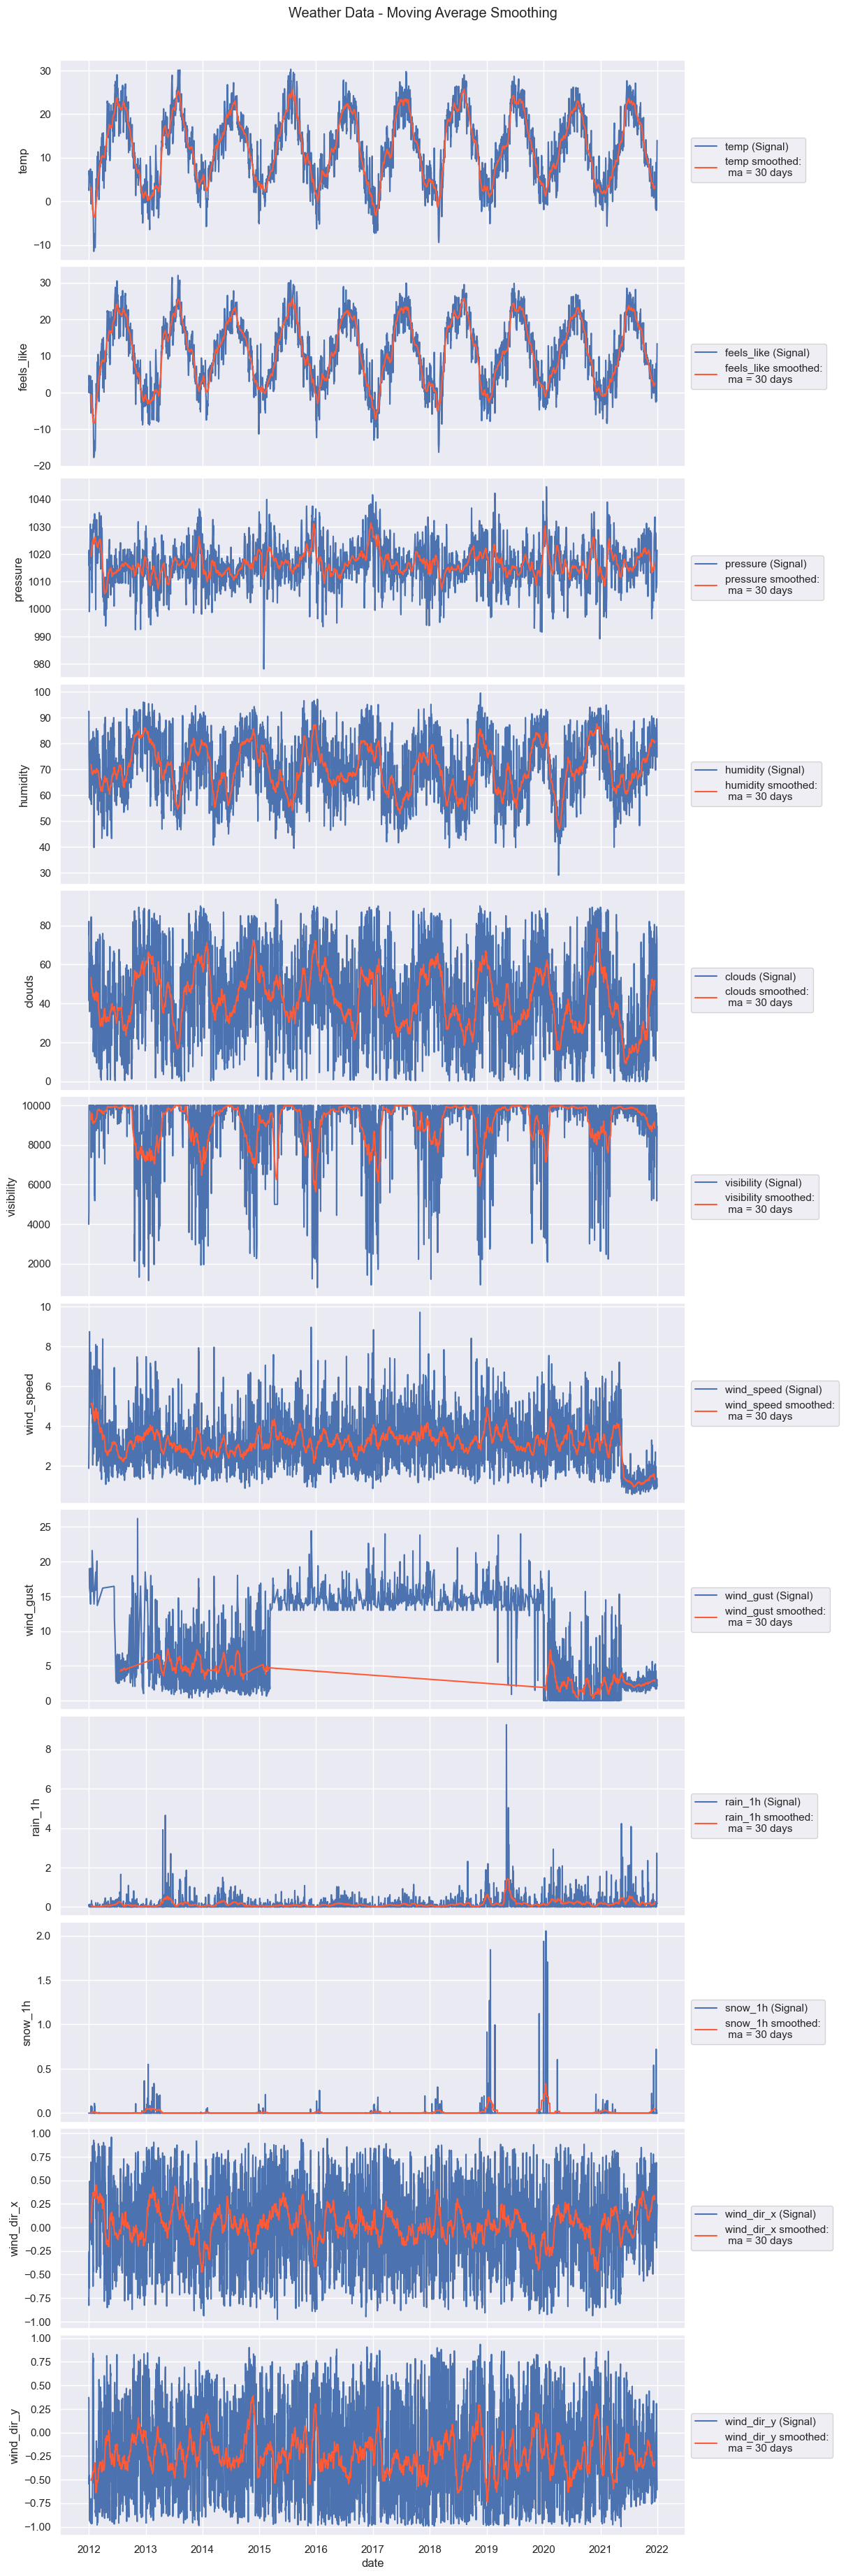

In [77]:
# Plot different weather features over the course of time

# Smooth and plot
fig, ax = plt.subplots(len(params), 1, figsize=(12, 3*len(params)), constrained_layout=True, sharex=True)
plt.suptitle('Weather Data - Moving Average Smoothing', y=1.02);

smooth_df = dyf.copy()

for i, e in enumerate(params):
    smooth_df[f'{e}_smooth_ma_30d'] = smooth_df[f'{e}'].rolling(window=30,center=True).mean() #compute the rolling mean
    sns.lineplot(x='date', y=f'{e}', label=f'{e} (Signal)', data=smooth_df,  ax=ax[i])
    sns.lineplot(x='date', y=f'{e}_smooth_ma_30d', label=f'{e} smoothed:\n ma = 30 days', data=smooth_df, color=NF_ORANGE, ax=ax[i])

    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='');
        
#sns.lineplot(x='date', y=f'{e}_smooth_ma_30d', label=f'{e} smoothed:\n ma = 30 days', data=smooth_df, color=sns_c[1], ax=ax[i+1])
#ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
#ax[i+1].set(title='', ylabel=r'$^\circ$C');

    
fig.savefig("../images/Weather_MA_Smoothing.png",dpi=300)

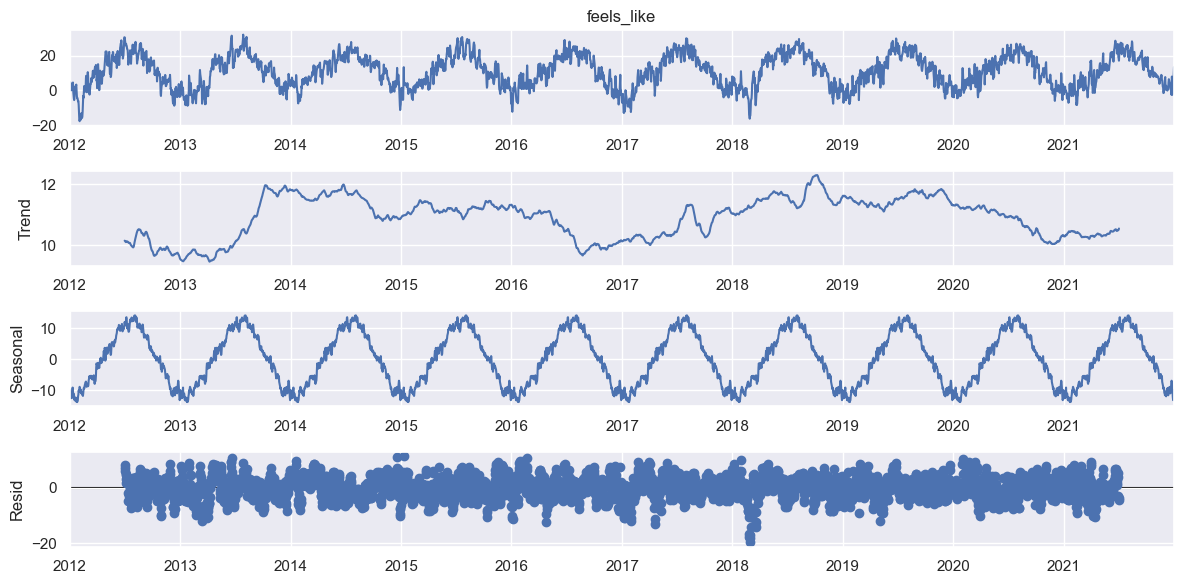

In [78]:
# Yearly seasonality
seas_decomp_yearly = seasonal_decompose(
    x=dyf['feels_like'], 
    model='additive', 
    two_sided=True,
    period= 365)

fig= seas_decomp_yearly.plot()

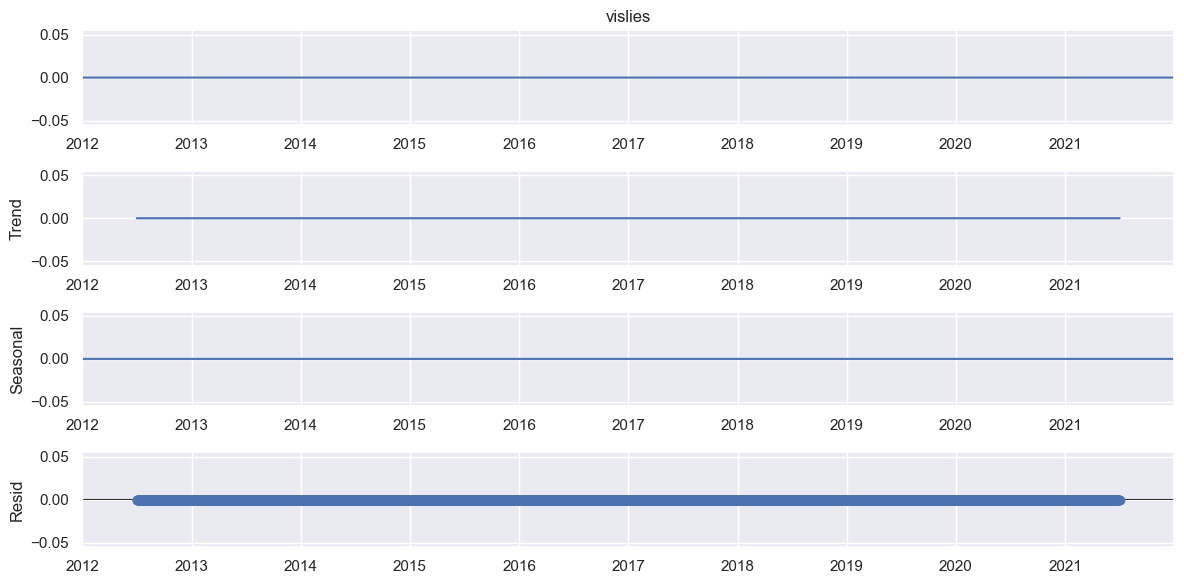

In [79]:
seas_decomp_yearly = seasonal_decompose(
    x=dyf['vislies'], 
    model='additive', 
    two_sided=True,
    period= 365)

fig= seas_decomp_yearly.plot()

Plot ['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_gust', 'rain_1h',
       'snow_1h', 'wind_dir_x', 'wind_dir_y',]
 by:
- whole time
- course over a(ny) day
- average course over all days
- course over a week (to see recurring daily patterns)
- course over all weeks

['date', 'year', 'month', 'week', 'day', 'weekday', 'dayofyear', 'hour']

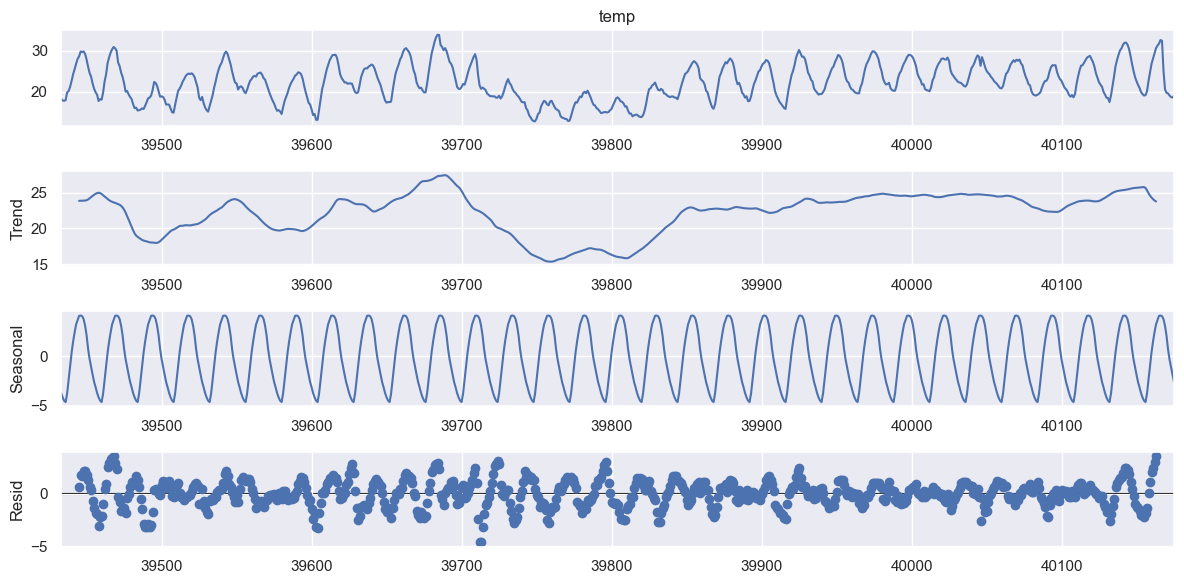

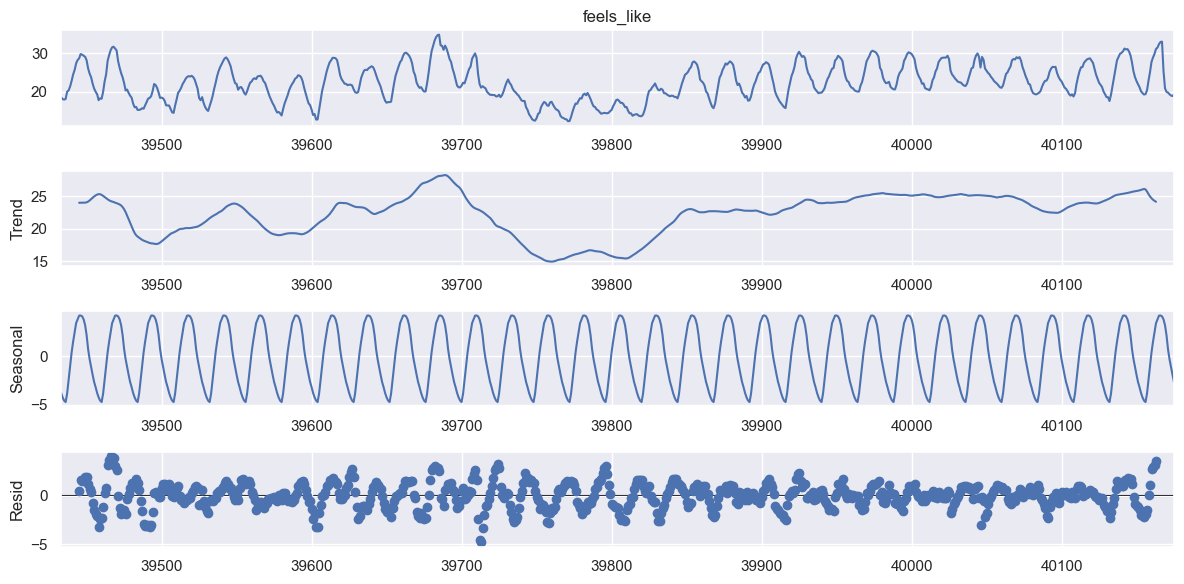

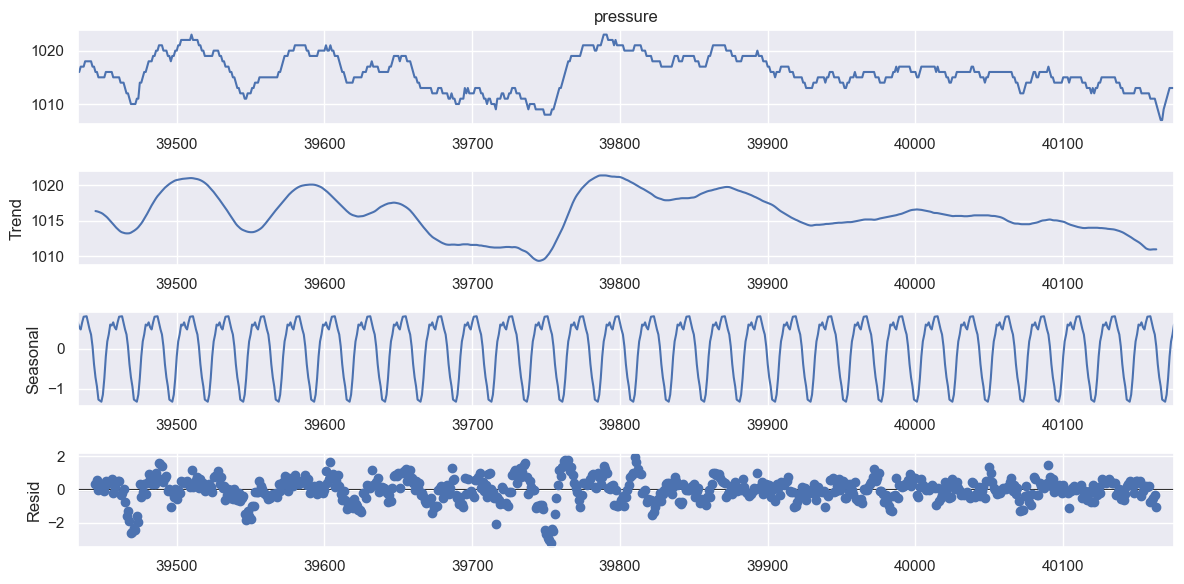

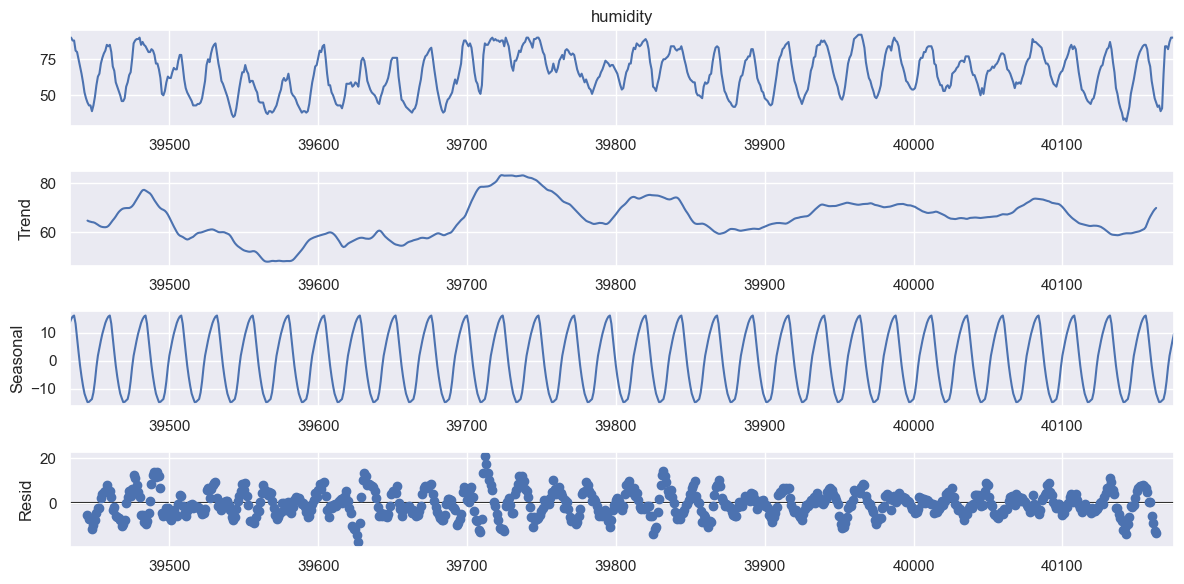

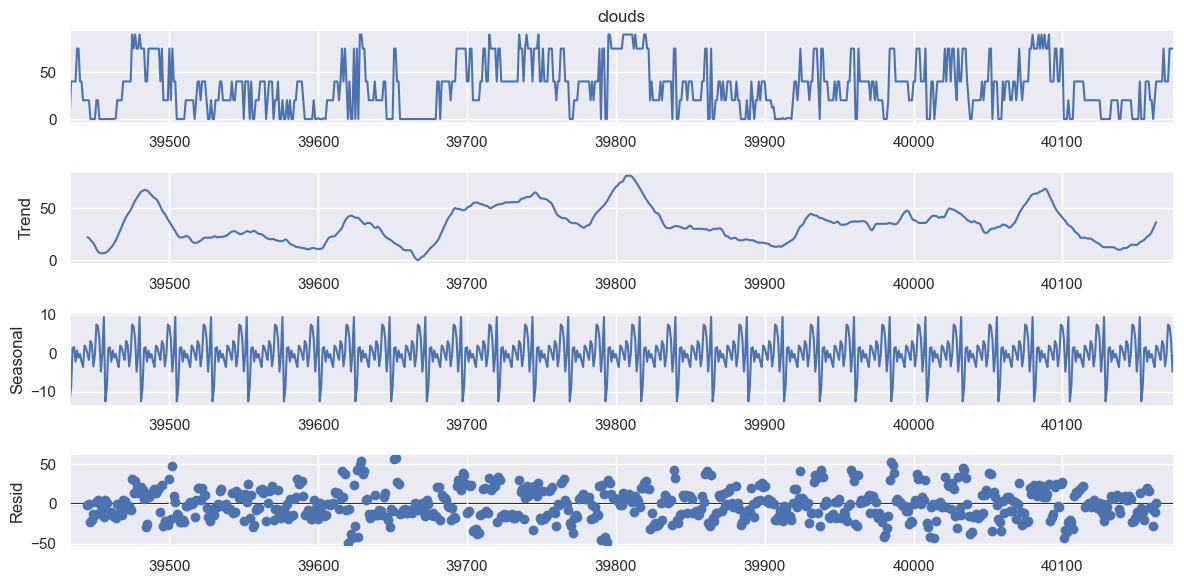

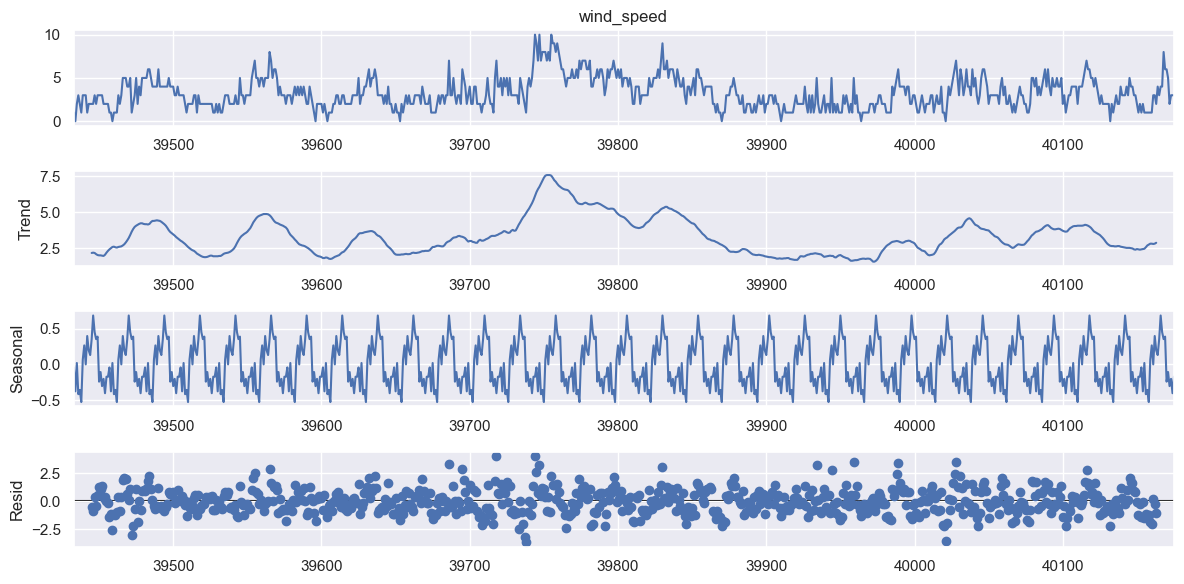

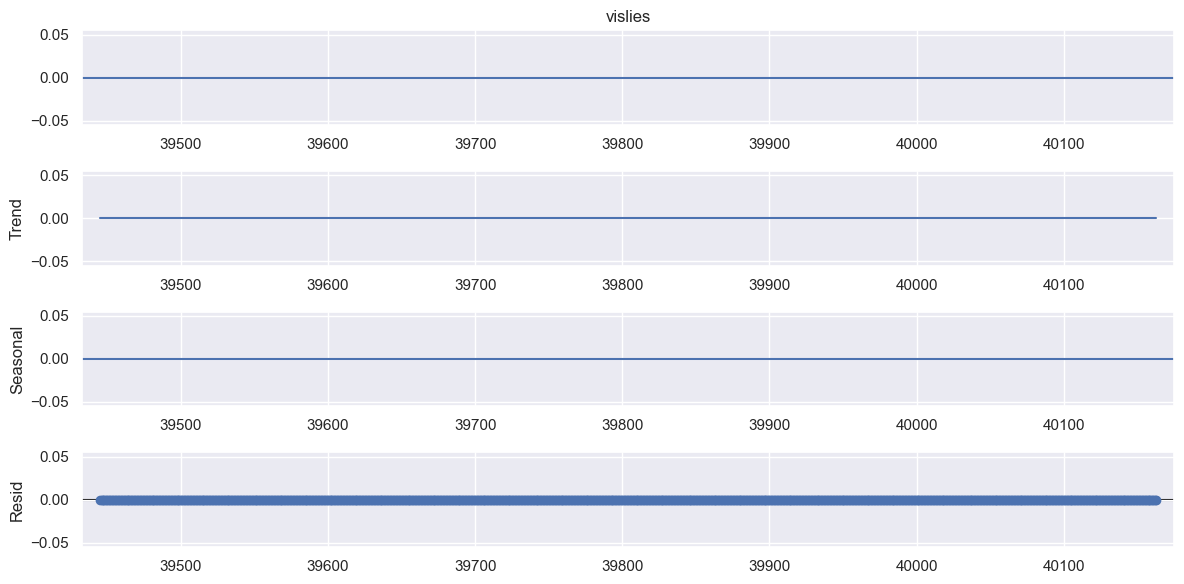

In [87]:
#daily cycle
p_start='2016-07-01'
p_end='2016-08-01'

elms=['temp',
 'feels_like',
 'pressure',
 'humidity',
 'clouds',
 #'visibility',
 'wind_speed',
 #'wind_gust',
 'vislies']

for i, e in enumerate(elms):
    seasonal_decompose(x=df.loc[(df['time']>p_start)&(df['time']<p_end)][f'{e}'], 
                        model='additive', 
                        two_sided=True,
                        period=24
                        ).plot()